In [1]:
import numpy as np
import os.path as osp
import matplotlib.pylab as plt
import sys
sys.path.insert(0, "/Users/kavimehta/cs284")

# from latent_3d_points.src.point_net_ae import PointNetAutoEncoder
# from latent_3d_points.src.autoencoder import Configuration as Conf
# from latent_3d_points.src.neural_net import MODEL_SAVER_ID

from latent_3d_points.src.in_out import snc_category_to_synth_id, create_dir, PointCloudDataSet, \
                                        load_all_point_clouds_under_folder, pickle_data, unpickle_data

from latent_3d_points.src.general_utils import plot_3d_point_cloud
# from latent_3d_points.src.tf_utils import reset_tf_graph

# from latent_3d_points.src.vanilla_gan import Vanilla_GAN
# from latent_3d_points.src.w_gan_gp import W_GAN_GP
# from latent_3d_points.src.generators_discriminators import latent_code_discriminator_two_layers,\
# latent_code_generator_two_layers

In [21]:
from sklearn.cluster import KMeans

In [28]:
def sort_points(all_points, kmeans):
    points = None
    cluster_size = {}
    for i in range(6):
        cluster =  all_points[kmeans.labels_ == i]
        pts = cluster[cluster[:,2].argsort()]
        cluster_size[i] = len(pts)
        
    sorted_inds = sorted(cluster_size.items(), key=lambda kv: kv[1])
    for kv in sorted_inds:
        i = kv[0]
        cluster =  all_points[kmeans.labels_ == i]
        pts = cluster[cluster[:,2].argsort()]
        if type(points) is not np.ndarray:
            points = pts
        else:
            points = np.concatenate((points,pts),axis=0)
    return points

In [29]:
def gen_dataset(num_pcs, num_points_removed):
    all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)
    batch = all_pc_data.next_batch(num_pcs)
    L = batch[0] # L is a list of chairs now
    print(L.shape)
    labels = batch[1]
    incomplete_set = []
    for i in range(len(L)):
        if i%100 ==0:
            print(i)
        kmeans = KMeans(n_clusters=6).fit(L[i])
        sorted_points = sort_points(L[i], kmeans)
        incomplete = sorted_points[num_points_removed:]
        incomplete_set.append(incomplete)
    incomplete_set = np.array(incomplete_set)
    incomplete_pc_data = PointCloudDataSet(point_clouds=incomplete_set, labels=labels, init_shuffle=False)
    pickle_data('incomplete_data_' + class_name, incomplete_pc_data)
    pickle_data('complete_data_' + class_name, all_pc_data)

In [54]:
### MODIFY class_name AND RUN TO GENERATE DATASET ###

class_name = 'bed'

top_in_dir = '../data/shape_net_core_uniform_samples_2048/'    

ae_configuration = '../data/single_class_ae/configuration'
syn_id = snc_category_to_synth_id()[class_name]
#syn_id = '03691459'
class_dir = osp.join(top_in_dir , syn_id)
all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)

gen_dataset(750, 100)

254 pclouds were loaded. They belong in 1 shape-classes.
254 pclouds were loaded. They belong in 1 shape-classes.
(254, 2048, 3)
0
100
200


In [14]:
###################################
### EVERYTHING BELOW IS TESTING ###
###################################

In [10]:
data1 = unpickle_data('incomplete_data')
incomplete_pc_data = next(data1)
data2 = unpickle_data('complete_data')
complete_pc_data = next(data2)

In [11]:
print(incomplete_pc_data)
print(complete_pc_data)

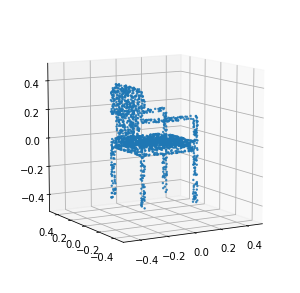

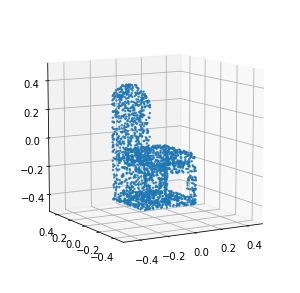

In [7]:
batch = all_pc_data.next_batch(21) # batch is a tuple of chair list, id list, None
L = batch[0] # L is a list of chairs now
labels = batch[1]
i = 0
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);
i = 20
plot_3d_point_cloud(L[i][:, 0], L[i][:, 1], L[i][:, 2], in_u_sphere=True);

In [8]:
kmeans = KMeans(n_clusters=6).fit(L[0])
kmeans.labels_

array([5, 2, 0, ..., 1, 1, 4], dtype=int32)

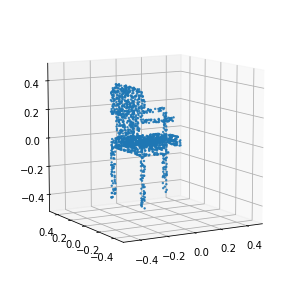

In [28]:
l1 = L[0][kmeans.labels_!=2]
plot_3d_point_cloud(l1[:, 0], l1[:, 1], l1[:, 2], in_u_sphere=True);

In [38]:
points = None
for i in range(6):
    cluster =  L[0][kmeans.labels_ == i]
    pts = cluster[cluster[:,2].argsort()]
    if type(points) is not np.ndarray:
        points = pts
    else:
        points = np.concatenate((points,pts),axis=0)

In [39]:
print(points)

[[-0.20645024  0.21124092 -0.39865863]
 [-0.21045925  0.20949474 -0.3953916 ]
 [-0.2112987   0.19238536 -0.39101434]
 ...
 [ 0.06979464  0.19801182  0.1990658 ]
 [ 0.18407886  0.20802279  0.1991964 ]
 [ 0.16501144  0.19395347  0.19920544]]


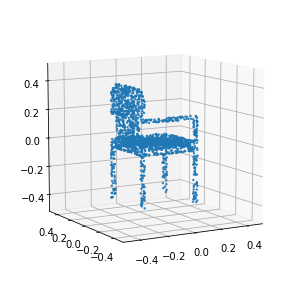

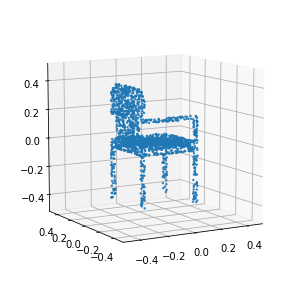

In [45]:
n = points.shape[0] - 100
plot_3d_point_cloud(points[:n, 0], points[:n, 1], points[:n, 2], in_u_sphere=True)